In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

### Criar lista de arquivos e dicionário

In [2]:
arquivos = os.listdir("./dados_2002_21/")
estados = {}
print(arquivos)

['Tabela1.xls', 'Tabela10.xls', 'Tabela11.xls', 'Tabela12.xls', 'Tabela13.xls', 'Tabela14.xls', 'Tabela15.xls', 'Tabela16.xls', 'Tabela17.xls', 'Tabela18.xls', 'Tabela19.xls', 'Tabela2.xls', 'Tabela20.xls', 'Tabela21.xls', 'Tabela22.xls', 'Tabela23.xls', 'Tabela24.xls', 'Tabela25.xls', 'Tabela26.xls', 'Tabela27.xls', 'Tabela28.xls', 'Tabela29.xls', 'Tabela3.xls', 'Tabela30.xls', 'Tabela31.xls', 'Tabela32.xls', 'Tabela33.xls', 'Tabela4.xls', 'Tabela5.xls', 'Tabela6.xls', 'Tabela7.xls', 'Tabela8.xls', 'Tabela9.xls']


In [3]:
def extair_dados(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    dados_anuais = pd.DataFrame()
    dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
    dados_anuais[['Categoria','Local']] = categoria,local
    #dados_anuais = dados_anuais.fillna(0)
    dados_anuais['Taxa de Crescimento'] = (dados_anuais['Valor_preço_anterior']/dados_anuais['Valor_ano_anterior'])-1
    
    #criar funções para tratar colunas novas
    return dados_anuais, categoria



In [4]:
def extrair_local(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    #categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    return local

In [5]:
for i in arquivos:
    celula = 1
    local = extrair_local(i, celula)
    estados[local] = dict()
    #falta loopar pelas celulas
    for celula in range(1,17):
        dados_anuais, categoria = extair_dados(i, celula)
        estados[local][categoria] = dados_anuais

C:\Users\leoau\AppData\Local\Temp\ipykernel_3708\1470444807.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
C:\Users\leoau\AppData\Local\Temp\ipykernel_3708\1470444807.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
C:\Users\leoau\AppData\Local\Temp\ipykernel_3708\1470444807.py:8: FutureWarning: Downcasting object dt

In [6]:
for i in estados['Rio de Janeiro'].keys():
    print(i)

Total das Atividades
Agropecuária
Indústrias extrativas
Indústrias de Transformação
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação
Construção
Comércio e reparação de veículos automotores e motocicletas
Transporte, armazenagem e correio
Alojamento e alimentação
Informação e comunicação
Atividades financeiras, de seguros e serviços relacionados
Atividades Imobiliárias
Atividades profissionais, científicas e técnicas, administrativas e serviços complementares
Administração, defesa, educação e saúde públicas e seguridade social
Educação e saúde privadas
Outras atividades de serviços


In [7]:
estados['Paraná']['Total das Atividades']

,Ano,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Categoria,Local,Taxa de Crescimento
57,2002,0.000000,0.000000,76353.218039,Total das Atividades,Paraná,NaN
58,2003,76353.218039,79439.038710,96482.402510,Total das Atividades,Paraná,0.040415
59,2004,96482.402510,101431.316184,107706.240774,Total das Atividades,Paraná,0.051293
60,2005,107706.240774,108106.274237,110617.035441,Total das Atividades,Paraná,0.003714
61,2006,110617.035441,112664.346098,119448.899088,Total das Atividades,Paraná,0.018508
62,2007,119448.899088,127838.107245,143964.629399,Total das Atividades,Paraná,0.070233
63,2008,143964.629399,149257.564295,159424.943473,Total das Atividades,Paraná,0.036766
64,2009,159424.943473,156484.881654,171043.526686,Total das Atividades,Paraná,-0.018442
65,2010,171043.526686,187495.432188,192924.561102,Total das Atividades,Paraná,0.096185
66,2011,192924.561102,200681.807240,218851.112681,Total das Atividades,Paraná,0.040209


In [8]:
estados['Paraná']['Total das Atividades'].columns

Index(['Ano', 'Valor_ano_anterior', 'Valor_preço_anterior', 'Valor_corrente',
       'Categoria', 'Local', 'Taxa de Crescimento'],
      dtype='object')

In [ ]:
#CONTINAUR DEPOIS, construção do DF da industria comoo um todo
estados['Rio de Janeiro']['Industria'] = dict()
industria_rio = pd.DataFrame(columns=['Ano', 'Valor_ano_anterior', 'Valor_preço_anterior', 'Valor_corrente',
       'Categoria', 'Local', 'Taxa de Crescimento'])
for i in 
estados['Rio de Janeiro']['Industria'] = industria_rio

In [9]:
locais_importantes = ['Rio de Janeiro','Região Sudeste','São Paulo']
atividades_importantes = ['Total das Atividades','Indústrias extrativas',
                          'Indústrias de Transformação',
                          'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
                          'Construção']

<Axes: xlabel='Ano'>

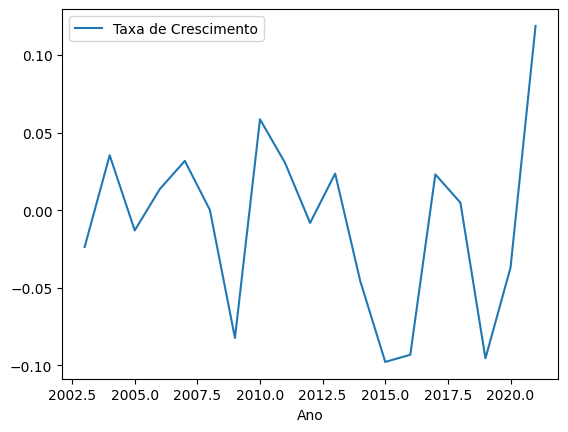

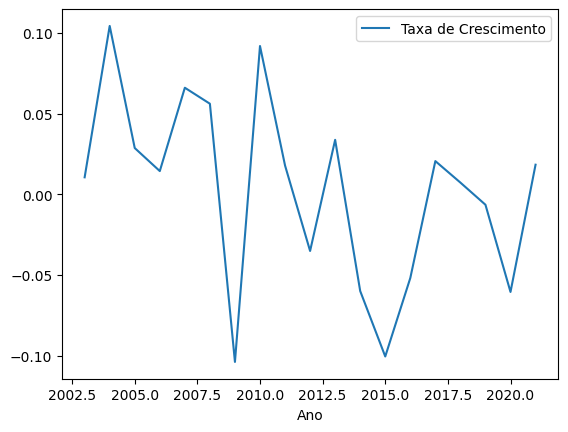

In [41]:
estados['Rio de Janeiro']['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].plot(x='Ano')
estados['São Paulo']['Indústrias de Transformação'][['Ano','Taxa de Crescimento']].plot(x='Ano')

In [12]:
recorte = 'Jornada_PPGSA_2024'
for local in locais_importantes:
    for atividade in atividades_importantes:
        estados[local][atividade].to_csv(recorte+'/'+str(local)+'_'+str(atividade)+'.csv')